In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
import joblib

nlist = joblib.load('nlist.pkl')

In [3]:
len(nlist)

26716

In [4]:
total_df = pd.read_pickle('total_df.pkl')

In [5]:
len(total_df)
y = total_df['keyword']
len(y)

26716

In [6]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

In [7]:
vectorizer = CountVectorizer(stop_words={'english'},min_df=50, max_df=.01 ,ngram_range=(1,2))

cv = vectorizer.fit_transform(nlist)

#vectorizer.get_feature_names()

In [8]:
vectorizer = TfidfVectorizer(stop_words={'english'},min_df=50, max_df=.01 ,ngram_range=(1,2))

cv1 = vectorizer.fit_transform(nlist)

#vectorizer.get_feature_names()

In [10]:
cv1.data
cv1.max()
cv.max()

53

In [99]:
vectorizer.get_feature_names()[:30]

['02',
 '02 years',
 '02114',
 '02115',
 '02115 job',
 '10 billion',
 '10 enterprise',
 '10 hour',
 '10 paid',
 '10 time',
 '100 best',
 '100 company',
 '100 contributions',
 '100 countries',
 '100 million',
 '100 paid',
 '1000 largest',
 '10000',
 '100000',
 '100m',
 '1012',
 '1012 software',
 '1012 years',
 '1015',
 '1020',
 '10campus',
 '10campus uc',
 '10x',
 '11 interventions',
 '110']

In [11]:
X = cv1

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=4545)

In [24]:
## Training a classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [25]:
#clf.class_count_
clf.classes_
clf.get_params()
clf.score(X_train, y_train)
#clf.feature_count_
#clf.coef_
#clf.predict(X_test)

0.92385433934014227

In [26]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss

In [27]:
print(classification_report(y_test,clf.predict(X_test)))

                precision    recall  f1-score   support

  data+analyst       0.65      0.70      0.68      2122
data+architect       0.63      0.65      0.64      1673
 data+engineer       0.57      0.55      0.56      2077
data+scientist       0.63      0.56      0.59      1292
  statistician       0.91      0.93      0.92       851

   avg / total       0.65      0.65      0.65      8015



In [28]:
print('Accuracy Score(Train): ',accuracy_score(y_train,clf.predict(X_train)))
print('Hamming Loss(Train): ',hamming_loss(y_train,clf.predict(X_train)))


print('Accuracy Score(Test): ',accuracy_score(y_test,clf.predict(X_test)))
print('Hamming Loss(Test): ',hamming_loss(y_test,clf.predict(X_test)))


Accuracy Score(Train):  0.92385433934
Hamming Loss(Train):  0.0761456606599
Accuracy Score(Test):  0.651278852152
Hamming Loss(Test):  0.348721147848


In [29]:
con_mat = confusion_matrix(y_test,clf.predict(X_test))
con_mat_train = confusion_matrix(y_train,clf.predict(X_train))
print(con_mat)
print(con_mat_train)

[[1482  168  305  135   32]
 [ 224 1080  314   50    5]
 [ 333  375 1150  215    4]
 [ 202   98  239  720   33]
 [  23    5    7   28  788]]
[[4779   21    6    8   24]
 [ 115 3803    5    4    3]
 [ 186  411 4314   10    2]
 [ 196  109  237 2325   21]
 [  21    1   13   31 2056]]


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb


In [31]:
list(clf.classes_)

['data+analyst',
 'data+architect',
 'data+engineer',
 'data+scientist',
 'statistician']

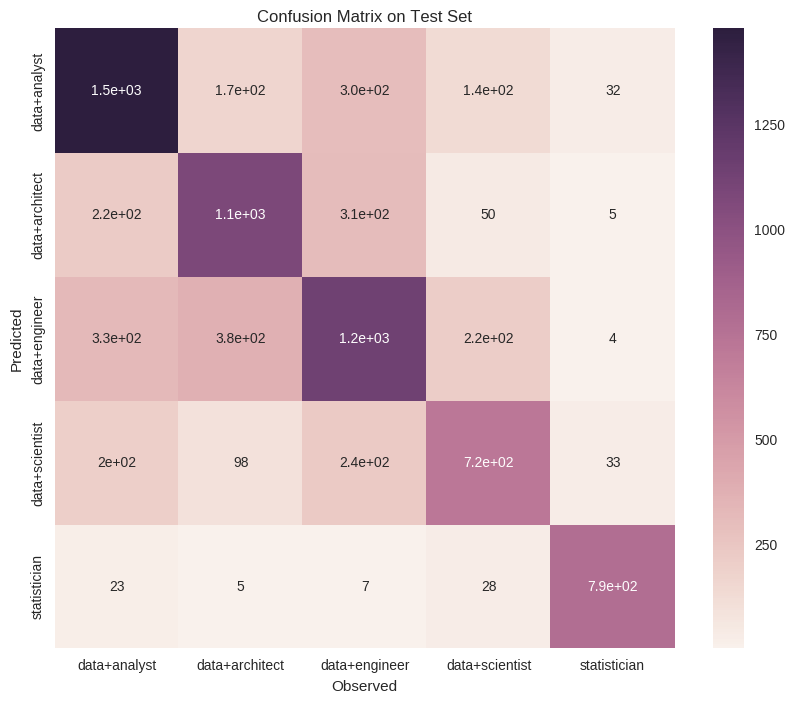

In [32]:
sb.set_palette("GnBu")
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(con_mat,
           xticklabels=list(clf.classes_),
           yticklabels=list(clf.classes_),
           annot=True);
plt.xlabel('Observed');
plt.ylabel('Predicted');
plt.title('Confusion Matrix on Test Set');


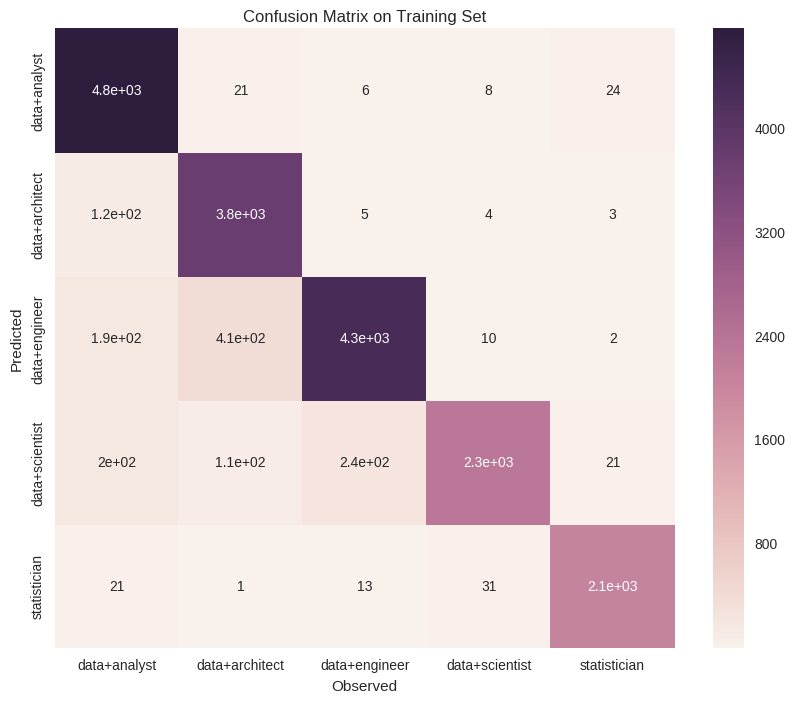

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(con_mat_train,xticklabels=list(clf.classes_),yticklabels=list(clf.classes_),annot=True);
plt.xlabel('Observed');
plt.ylabel('Predicted');
plt.title('Confusion Matrix on Training Set');
